<a href="https://colab.research.google.com/github/rostro36/Vernehmlassungen/blob/master/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting

## Import libraries & load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from textwrap import wrap
import os

plt.style.use('tableau-colorblind10')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

URL = r'https://raw.githubusercontent.com/rostro36/Vernehmlassungen/master/laws.csv'
df = pd.read_csv(URL)

if not os.path.exists('plots'):
    os.mkdir('plots')

## Plot departments

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


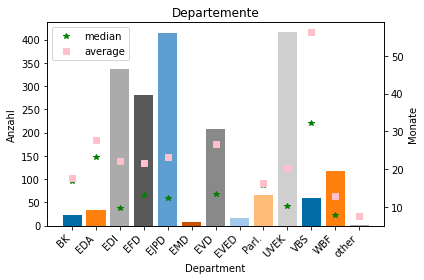

In [2]:
ax = plt.gca()
departments = sorted(set(df['Department']))
counts = [list(df['Department']).count(department)
          for department in departments]
X = np.arange(len(departments))
ax.bar(list(departments), counts, color=colors, label=departments)
ax.set_xticklabels(departments)
ax.set_xlabel('Department')
ax.set_ylabel('Anzahl')
plt.xticks(rotation=45, ha="right")

ax2 = ax.twinx()
ax2.set_ylabel('Monate')
medians = [0]*len(departments)
averages = [0]*len(departments)
for index, department in enumerate(departments):
    medians[index] = np.median(
        list(df[df['Department'] == department]['Months_until_accept'].dropna()))
    averages[index] = np.average(
        list(df[df['Department'] == department]['Months_until_accept'].dropna()))
ax2.plot(list(departments), medians, marker='*',
         color='green', linestyle='', label='median')
ax2.plot(list(departments), averages, marker='s',
         color='pink', linestyle='', label='average')

ax2.legend()
plt.title('Departemente')
plt.tight_layout()
plt.savefig('plots/Department.svg')
plt.show()

## Plot discrete

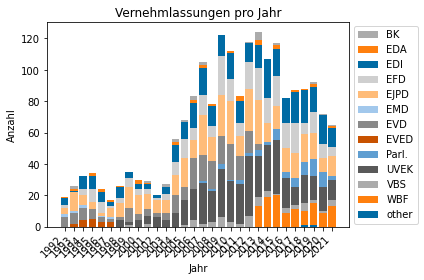

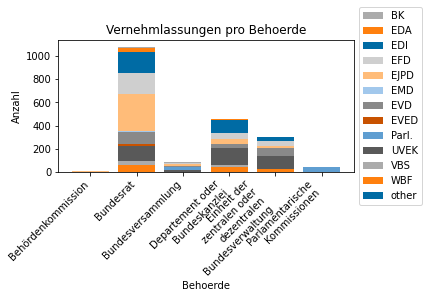

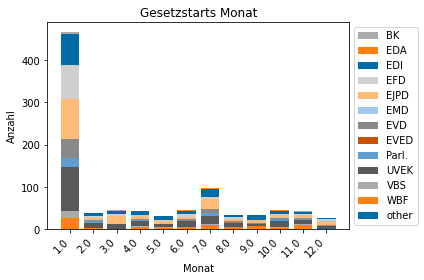

In [3]:
def make_discrete(keyword, xlabel, ylabel, title):
    ax = plt.gca()
    values = sorted(set(df[keyword].dropna()))
    accumulated_counts = [0]*len(values)
    departments = sorted(set(df['Department']))
    for index, department in enumerate(reversed(departments)):
        counts = [list(df[df['Department'] == department]
                       [keyword]).count(value) for value in values]
        ax.bar(['\n'.join(wrap(str(value), 20)) for value in values], counts,
               color=colors[index % len(colors)], bottom=accumulated_counts, label=department)
        accumulated_counts = [accumulated_counts[i]+counts[i]
                              for i in range(len(counts))]
    plt.legend([Patch(facecolor=colors[(len(departments)-1-index) % len(colors)], label=departments[index])
               for index in range(len(departments))], departments, bbox_to_anchor=(1, 0.5), loc="center left")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('plots/'+keyword+'.svg')
    plt.show()


make_discrete('Vernehmlassung_Year', 'Jahr',
              'Anzahl', 'Vernehmlassungen pro Jahr')
make_discrete('Behoerde', 'Behoerde', 'Anzahl',
              'Vernehmlassungen pro Behoerde')
make_discrete('Accept_month', 'Monat', 'Anzahl', 'Gesetzstarts Monat')

## Plot continuous

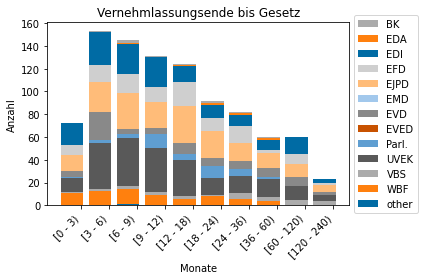

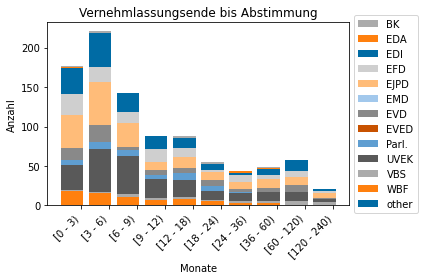

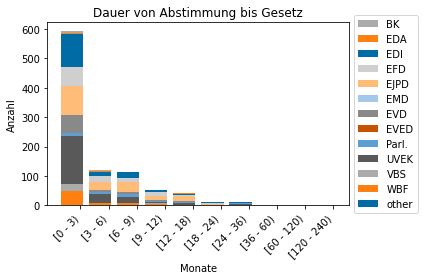

In [4]:
def make_continuous(bins, keyword, xlabel, ylabel, title):
    ax = plt.gca()
    departments = sorted(set(df['Department']))
    accumulated_counts = [0]*(len(bins)-1)
    for index, department in enumerate(reversed(departments)):
        hist, _ = np.histogram(
            list(df[df['Department'] == department][keyword]), bins)
        X = np.arange(len(hist))
        ax.bar(list(X), list(hist), color=colors[index % len(
            colors)], bottom=accumulated_counts, label=department)
        accumulated_counts = [accumulated_counts[i]+hist[i]
                              for i in range(len(hist))]
    plt.legend([Patch(facecolor=colors[(len(departments)-1-index) % len(colors)], label=departments[index])
               for index in range(len(departments))], departments, bbox_to_anchor=(1, 0.5), loc="center left")

    plt.xticks([i+0.3 for i in range(len(hist))], [
        '[{} - {})'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation=45, ha="right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('plots/'+keyword+'.svg')
    plt.show()


bins = [0, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 5, 10, 20]
bins = [int(i*12) for i in bins]
make_continuous(bins, 'Months_until_accept', 'Monate',
                'Anzahl', 'Vernehmlassungsende bis Gesetz')
make_continuous(bins, 'Months_until_decision', 'Monate',
                'Anzahl', 'Vernehmlassungsende bis Abstimmung')


ax = plt.gca()
departments = sorted(set(df['Department']))
accumulated_counts = [0]*(len(bins)-1)
for index, department in enumerate(reversed(departments)):
    dep_df = df[df['Department'] == department]
    gesetz_df = dep_df['Months_until_accept'].dropna()
    abstimmung_df = dep_df['Months_until_decision'].dropna()
    hist, _ = np.histogram([gesetz_df.iloc[i]-abstimmung_df.iloc[i]
                           for i in range(len(abstimmung_df))], bins)
    X = np.arange(len(hist))
    ax.bar(list(X), list(hist), color=colors[index % len(
        colors)], bottom=accumulated_counts, label=department)
    accumulated_counts = [accumulated_counts[i]+hist[i]
                          for i in range(len(hist))]
plt.legend([Patch(facecolor=colors[(len(departments)-1-index) % len(colors)], label=departments[index])
           for index in range(len(departments))], departments, bbox_to_anchor=(1, 0.5), loc="center left")

plt.xticks([i+0.3 for i in range(len(hist))], [
    '[{} - {})'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation=45, ha="right")
plt.xlabel('Monate')
plt.ylabel('Anzahl')
plt.title('Dauer von Abstimmung bis Gesetz')
plt.tight_layout()
plt.savefig('plots/'+'delta'+'.svg')
plt.show()